# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [2]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [3]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [4]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

## Собственная реализация

In [5]:
# создаем фиктивный признак, который нужен для рассчета bias
def fake_feature(n):
  return np.ones(len(n)).reshape(-1, 1)

In [6]:
# добавляем новый (фиктивный) признак в матрицу признаков объектов
X_modified_train = np.concatenate((X_train, fake_feature(X_train)), axis=1)
X_modified_test = np.concatenate((X_test, fake_feature(X_test)), axis=1)

In [33]:
# МНК через псевдообратную матрицу
def calculate_weights(x, y):
  return np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), np.matmul(x.transpose(), y))

In [8]:
weights = calculate_weights(X_modified_train, y_train)

print("weights = " + str(*list(weights[:-1])))
print("bias = " + str(weights[-1]))

weights = 9.99578420381686
bias = -7.188023699803196


In [9]:
y_test_predicted = np.matmul(X_modified_test, weights)
y_train_predicted = np.matmul(X_modified_train, weights)

In [10]:
print('Train MSE: ', np.mean(np.power((y_train - y_train_predicted), 2)))
print('Test MSE: ', np.mean(np.power((y_test - y_test_predicted), 2)))

Train MSE:  74.89797304517677
Test MSE:  90.54555984178346


In [11]:
print('Train MAE: ', np.mean(abs(y_train - y_train_predicted)))
print('Test MAE: ', np.mean(abs(y_test - y_test_predicted)))

Train MAE:  6.746507416260786
Test MAE:  7.943597765179568


## sklearn реализация

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
model = LinearRegression()

model.fit(X_train, y_train) 

w = model.coef_
b = model.intercept_

In [14]:
w, b

(array([9.9957842]), -7.1880236998032)

In [15]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  74.89797304517677
Test MSE:  90.54555984178346


In [16]:
print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  6.746507416260784
Test MAE:  7.943597765179566


### Выводы
Результаты из sklearn ничем не отличаются, сл-но, можно сделать вывод, что, рассчеты верны.

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [17]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

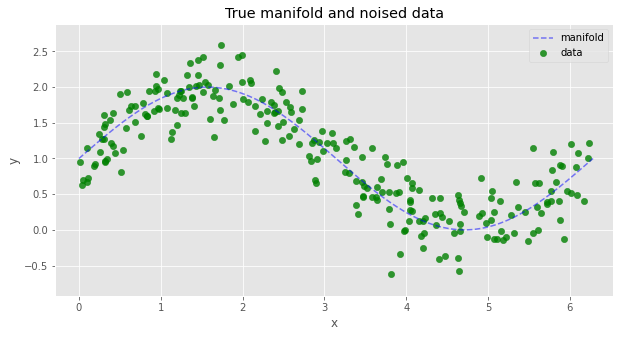

In [18]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [20]:
x_modified_train = data['x_train'].reshape(-1, 1)
X_modified_train = np.concatenate((x_modified_train, fake_feature(x_modified_train)), axis=1)

weights = calculate_weights(X_modified_train, data['y_train'])
y_train_predicted = np.matmul(X_modified_train, weights)

print("weights = " + str(*list(weights[:-1])))
print("bias = " + str(weights[-1]))

weights = -0.28401937229781016
bias = 1.8777567248679614


In [21]:
print('MSE: ', mean_squared_error(data['y_train'], y_train_predicted))
print('MAE: ', mean_absolute_error(data['y_train'], y_train_predicted))

MSE:  0.2750135605932602
MAE:  0.4313730907766654


Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [22]:
from sklearn.preprocessing import PolynomialFeatures

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

In [23]:
# функция для отрисовки полиномов
def polynom(x, weights):
  result = 0
  for i in range(len(weights) - 1):
    result += weights[i] * np.power(x, (i + 1))
  result += weights[-1]
  return result

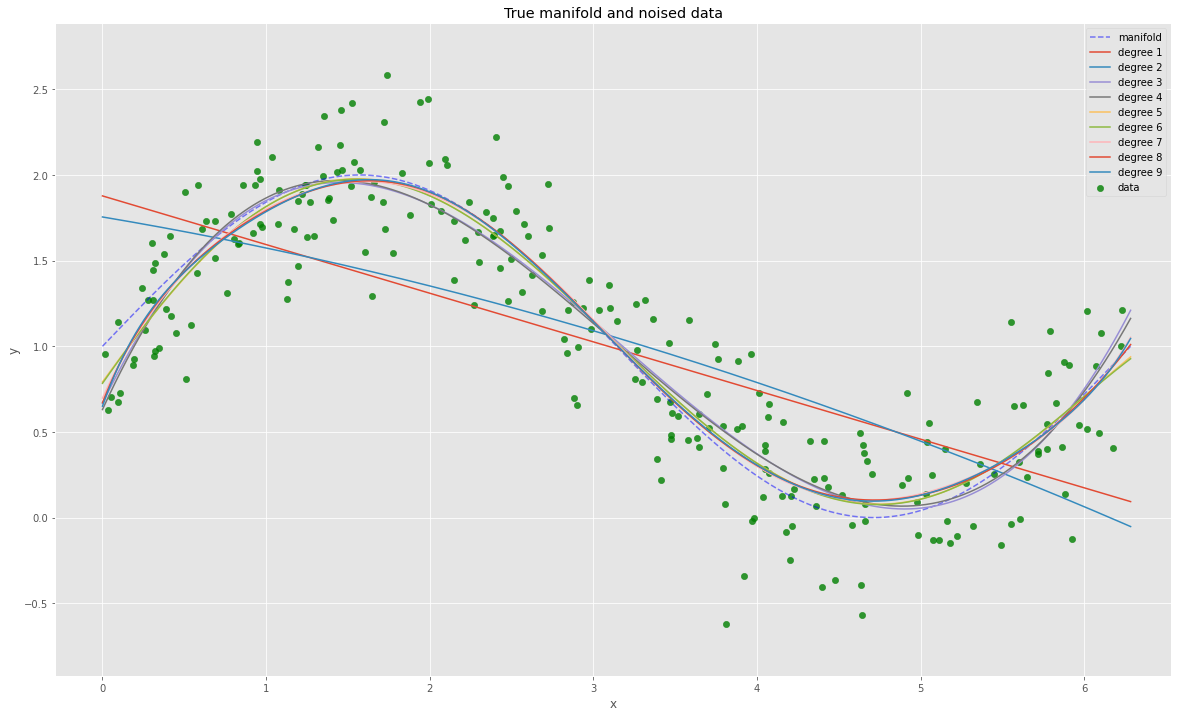

In [34]:
# заранее создаем списки, которые будут хранить Sum of Squared Errors (SSE) и веса регрессий разных порядков полинома модели
SSE = []
weights = []

x_modified_train = data['x_train'].reshape(-1, 1)

# для графиков
plt.figure(figsize=(20, 12))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')

# пройдем все степени от 1 до 9 (число взятое в данной ситуации наобум, но вообще имеет смысл изучать данные...)
for i in range(1, 10):
  if i == 1:
    X_modified_train = x_modified_train
  else:
    X_modified_train = np.concatenate((X_modified_train, np.power(x_modified_train, i)), axis=1)
  x = np.concatenate((X_modified_train, fake_feature(x_modified_train)), axis=1)
  weights.append(calculate_weights(x, data['y_train']))
  y_predicted = np.matmul(x, weights[-1])
  SSE.append(np.sum(np.square(data['y_train'] - y_predicted)))
  plt.plot(data['support'], polynom(data['support'], weights[-1]), label='degree ' + str(i))
plt.legend(loc='upper right')
plt.show()

In [35]:
# посчитаем для каждой модели Bayesian Information Criterion (BIC)
# source: http://www.machinelearning.ru/wiki/index.php?title=Байесовский_информационный_критерий
BIC = []
n = len(x_modified_train)

for k in range (1, 10):
  BIC.append(n * np.log(SSE[k - 1] / n) + k * np.log(n))

i = np.argmin(BIC)

print("Больше всего подходит полином " + str(i + 1) + "-ого порядка. Его значения:")
print("weights = " + str(list(weights[i][:-1])))
print("bias = " + str(weights[i][-1]))

Больше всего подходит полином 3-ого порядка. Его значения:
weights = [1.9737291304747089, -0.8823283755650593, 0.0926220137207947]
bias = 0.6667626129069717


# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [26]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

## Задание 3.4

In [28]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [29]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

model.fit(X_train, y_train)

feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])
feature_importance['Название признака'] = house_data['feature_names']
feature_importance['Важность признака'] = pd.Series(abs(model.coef_))

features = feature_importance.sort_values(by='Важность признака', ascending=False).head(7).index

X_reduced = X.iloc[:, features]
X_reduced_train = X_train.iloc[:, features]

competitor_model = LinearRegression()
competitor_model.fit(X_reduced_train, y_train)

LinearRegression()

In [31]:
print('Initial Dataset MSE: ', mean_squared_error(y, model.predict(X)))
print('Reduced Dimensions Dataset MSE: ', mean_squared_error(y, competitor_model.predict(X_reduced)))

Initial Dataset MSE:  22.19650990653747
Reduced Dimensions Dataset MSE:  24.158349413438284


In [32]:
print('Initial Dataset MAE: ', mean_absolute_error(y, model.predict(X)))
print('Reduced Dimensions Dataset MAE: ', mean_absolute_error(y, competitor_model.predict(X_reduced)))

Initial Dataset MAE:  3.303545781333589
Reduced Dimensions Dataset MAE:  3.5331878271573727
